In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
import torch
cuda = torch.cuda.is_available()

from torch.autograd import Variable
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

# Flatten the 2d-array image into a vector
tensorify = lambda x: ToTensor()(x)


# Define the train and test sets
dset_train = MNIST("./", train=True,  download=True, transform=tensorify)
dset_test  = MNIST("./", train=False, transform=tensorify)


# The loaders perform the actual work
batch_size = 64
train_loader = DataLoader(dset_train, batch_size=batch_size, pin_memory=cuda)
valid_loader  = DataLoader(dset_test, batch_size=batch_size, pin_memory=cuda)

In [37]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.m1 = nn.MaxPool2d((2,2), stride=2, return_indices=True)
        self.c1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3)
        self.m2 = nn.MaxPool2d((2,2), stride=2, return_indices=True)
        
    def forward(self, x):
        size1 = x.size()
        x, ind1 = self.m1(x)
        x = self.c1(F.relu(x))
        size2 = x.size()
        x, ind2 = self.m2(F.relu(x))
        return x, size1, ind1, size2, ind2
    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.m2 = nn.MaxUnpool2d((2,2), stride=2)
        self.c1 = nn.ConvTranspose2d(in_channels=64, out_channels=1, kernel_size=3)
        self.m1 = nn.MaxUnpool2d((2,2), stride=2)
        
    def forward(self, z, size1, ind1, size2, ind2):
        z = self.m2(z, indices=ind2, output_size=size2)
        z = self.c1(F.relu(z))
        x = self.m2(F.relu(z), indices=ind1, output_size=size1)
        return x

class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        
    def forward(self, x):
        z, size1, ind1, size2, ind2 = self.encoder(x)
        self.decoder(z, size1, ind1, size2, ind2)
        return x
ae = TestModel()

In [38]:
loss_function = F.mse_loss
optimizer = torch.optim.Adam(ae.parameters(), lr=0.0001)

In [42]:
num_epochs = 20
train_losses = []
valid_losses = []
for epoch in range(num_epochs):
    ae.train(True)
    losses = []
    for x, y in train_loader:
        x = Variable(x, requires_grad=True)
        
        x_hat = ae(x)
        loss = loss_function(x, x_hat)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses += [loss.item()]
    print(losses)
    train_losses += [np.mean(losses)]
    
    ae.eval()
    with torch.no_grad():
        losses = []
        for x, y in valid_loader:
            x = Variable(x, requires_grad=True)

            x_hat = ae(x)
            loss = loss_function(x, x_hat)
            losses += [loss.item()]
        valid_losses += [np.mean(losses)]
    break
    

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [40]:
train_losses, valid_losses

([0.0], [0.0])

In [52]:
a = x[0].detach().numpy().swapaxes(0,2)
a.shape

(28, 28, 1)

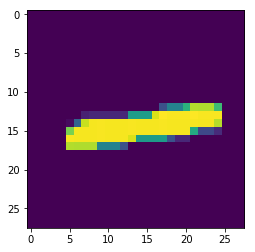

In [55]:
plt.imshow(a.squeeze())
b = ae(x)[0].detach().numpy().swapaxes(0,2)

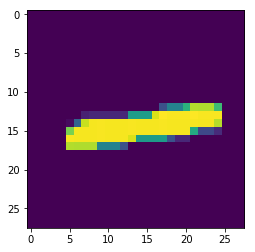

In [56]:
plt.imshow(b.squeeze())